In [1]:
# # pip install wandb
# ! pip install lightgbm  

In [2]:
# elmentem ezt

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import wandb
from sklearn.ensemble import RandomForestClassifier

In [4]:
readIn = pd.read_csv("data/train_df.csv")
train_df = pd.DataFrame(readIn)

In [5]:
readIn = pd.read_csv("data/res_df.csv")
df = pd.DataFrame(readIn)

In [6]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Bemenő változók és célváltozó meghatározása
bemenő_változók = df.columns.drop(['BORROWER_ID', 'target'])  # Az összes oszlop, kivéve a 'BORROWER_ID' és 'target'

bemenő_változók=['CONTRACT_CREDIT_LOSS_SUM',
                 'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN',
                 'CONTRACT_INCOME_SUM','CONTRACT_INSTALMENT_AMOUNT_MEAN',
                 'CONTRACT_INTEREST_RATE_MEAN',
                 'CONTRACT_LGD_SUM',
                 'CONTRACT_LOAN_AMOUNT_SUM',
                 'CONTRACT_MORTGAGE_LENDING_VALUE_SUM',
                 'BORROWER_TYPE_OF_SETTLEMENT_3.0',
                 'CONTRACT_BANK_ID_1d42bbf5',
                 'CONTRACT_BANK_ID_2c6f5579',
                 'CONTRACT_BANK_ID_3b3b8a5e',
                 'CONTRACT_BANK_ID_41562c5f',
                 'CONTRACT_BANK_ID_c8072c06',
                 'CONTRACT_BANK_ID_caa130b5',
                 'CONTRACT_BANK_ID_dfce4aec',
                 'CONTRACT_CREDIT_INTERMEDIARY_1.0',
                 # 'CONTRACT_CREDIT_INTERMEDIARY_20001.0',
                 'CONTRACT_CURRENCY_14',
                 'CONTRACT_FREQUENCY_TYPE_3265c5b7',
                 'CONTRACT_FREQUENCY_TYPE_ad534644',
                 'CONTRACT_LOAN_CONTRACT_TYPE_1',
                 'CONTRACT_LOAN_CONTRACT_TYPE_2',
                 'CONTRACT_LOAN_CONTRACT_TYPE_11',
                 'CONTRACT_LOAN_TYPE_5a06241e',
                 'CONTRACT_LOAN_TYPE_83910425',
                 'CONTRACT_LOAN_TYPE_b503a0de',
                 'CONTRACT_LOAN_TYPE_d3aaffde',
                 'CONTRACT_LOAN_TYPE_eab72d7a',
                 'CONTRACT_REFINANCED_2.0',
                 'CONTRACT_REFINANCED_10001.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0',
                 'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0',
                 'BORROWER_COUNTY_6.0',
                 'BORROWER_COUNTY_84.0',
                 'BORROWER_COUNTY_114.0',
                 'BORROWER_COUNTY_163.0',
                 'BORROWER_COUNTY_181.0' ]

X = train_df[bemenő_változók]  # Bemenő változók
y = train_df['target']  # Célváltozó

In [8]:
model = RandomForestClassifier(random_state=22, n_estimators= 110, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='log2')

In [9]:
model.fit(X,y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=110, random_state=22)

# SAVING RESULTS

In [10]:
merged_df = df[df['BORROWER_ID'].isin(df_target['BORROWER_ID'])]

In [11]:
X = merged_df[bemenő_változók]

In [12]:
merged_df['predicted_target'] = model.predict_proba(X)[:,1]

C:\Users\User\AppData\Local\Temp\ipykernel_6444\1279984231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_target'] = model.predict_proba(X)[:,1]


In [13]:
cols=['BORROWER_ID', 'predicted_target']

res=merged_df[cols]

In [14]:
res.columns=['BORROWER_ID', 'PRED']

In [15]:
#best so far: 0.01065148585696977
# ebben nem vagyok biztos: 0.011489444435447733

res['PRED'].mean()

0.009579762737999709

In [16]:
print(res.shape)
res.to_csv('data/results-intermediarymore2.csv', index=False)

(1117674, 2)


<Axes: >

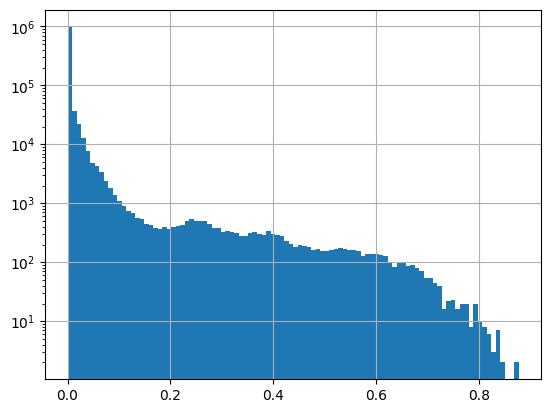

In [17]:
res['PRED'].hist(bins=100, log=True)

In [18]:
importance = model.feature_importances_

dict_imp={}

with open('fontossagok.txt', 'w') as file:
    for i, val in enumerate(importance):
        dict_imp[bemenő_változók[i]]=val
        print(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}")
        file.write(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}\n")

with open('fontossagok-tomb.txt', 'w') as file:
    for i, val in enumerate(importance):
        if (val>0):
            file.write(f"'{bemenő_változók[i]}',")

A(z) CONTRACT_CREDIT_LOSS_SUM oszlop fontossága: 0.20181208606639106
A(z) CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN oszlop fontossága: 0.01608246781785673
A(z) CONTRACT_INCOME_SUM oszlop fontossága: 0.017037219601002598
A(z) CONTRACT_INSTALMENT_AMOUNT_MEAN oszlop fontossága: 0.054446925444069386
A(z) CONTRACT_INTEREST_RATE_MEAN oszlop fontossága: 0.046769792819443254
A(z) CONTRACT_LGD_SUM oszlop fontossága: 0.03982647567624551
A(z) CONTRACT_LOAN_AMOUNT_SUM oszlop fontossága: 0.03413285820805191
A(z) CONTRACT_MORTGAGE_LENDING_VALUE_SUM oszlop fontossága: 0.014839376827906661
A(z) BORROWER_TYPE_OF_SETTLEMENT_3.0 oszlop fontossága: 0.004084342761121702
A(z) CONTRACT_BANK_ID_1d42bbf5 oszlop fontossága: 0.012339075608472133
A(z) CONTRACT_BANK_ID_2c6f5579 oszlop fontossága: 0.005342486962585954
A(z) CONTRACT_BANK_ID_3b3b8a5e oszlop fontossága: 0.000297680670057801
A(z) CONTRACT_BANK_ID_41562c5f oszlop fontossága: 0.0001333067910160744
A(z) CONTRACT_BANK_ID_c8072c06 oszlop fontossága: 0.0039835870

In [19]:
import operator
sorted_columns = sorted(dict_imp.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')

CONTRACT_LOAN_TYPE_5a06241e: 0.20189326183204875
CONTRACT_CREDIT_LOSS_SUM: 0.20181208606639106
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0: 0.12055615968136854
CONTRACT_INSTALMENT_AMOUNT_MEAN: 0.054446925444069386
CONTRACT_LOAN_TYPE_83910425: 0.050758415124197404
CONTRACT_INTEREST_RATE_MEAN: 0.046769792819443254
CONTRACT_LGD_SUM: 0.03982647567624551
CONTRACT_LOAN_AMOUNT_SUM: 0.03413285820805191
CONTRACT_BANK_ID_caa130b5: 0.03293088836121062
CONTRACT_REFINANCED_10001.0: 0.031119436541799717
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0: 0.018180244399100192
CONTRACT_LOAN_TYPE_b503a0de: 0.018140836956028486
CONTRACT_INCOME_SUM: 0.017037219601002598
CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN: 0.01608246781785673
CONTRACT_MORTGAGE_LENDING_VALUE_SUM: 0.014839376827906661
CONTRACT_FREQUENCY_TYPE_3265c5b7: 0.012938909878778883
CONTRACT_BANK_ID_1d42bbf5: 0.012339075608472133
CONTRACT_LOAN_CONTRACT_TYPE_1: 0.011769317460484086
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0: 0.011739358194866047
CONTRACT_LOA

In [20]:
# print(res.shape)
# res.to_csv('data/results2.csv', index=False)

In [21]:
len(bemenő_változók)

40

In [22]:
imp=[]
imp2=[]
for i in range(len(i1)):
    if(i1[i]>0):
        imp.append(i1[i])

for i in range(len(importance)):
    imp2.append(importance[i])

NameError: name 'i1' is not defined

In [ ]:
imp

In [ ]:
imp2

In [ ]:
for i in range(len(importance)):
    print(imp[i]-importance[i])

In [ ]:


column_importance = {
    'CONTRACT_CREDIT_LOSS_SUM': 0.16910412766343422,
    'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN': 0.0010854199994039476,
    'CONTRACT_INCOME_SUM': 0.00016402107884890086,
    'CONTRACT_INSTALMENT_AMOUNT_MEAN': 0.031180862589240545,
    'CONTRACT_INTEREST_RATE_MEAN': 0.030192901911618403,
    'CONTRACT_LGD_SUM': 0.0325214105387914,
    'CONTRACT_LOAN_AMOUNT_SUM': 0.059547996438097175,
    'CONTRACT_MORTGAGE_LENDING_VALUE_SUM': 0.0,
    'BORROWER_COUNTY_6.0': 0.0005365996241172926,
    'BORROWER_COUNTY_84.0': 6.109712470258696e-05,
    'BORROWER_COUNTY_114.0': 9.897689643537617e-05,
    'BORROWER_COUNTY_163.0': 0.00019303156699422723,
    'BORROWER_COUNTY_181.0': 0.00016810538899377636,
    'BORROWER_TYPE_OF_SETTLEMENT_3.0': 0.0004964242038491479,
    'CONTRACT_BANK_ID_1d42bbf5': 0.02072295988285964,
    'CONTRACT_BANK_ID_2c6f5579': 0.015205379415055013,
    'CONTRACT_BANK_ID_3b3b8a5e': 0.0025394648772917995,
    'CONTRACT_BANK_ID_41562c5f': 0.000331062561971647,
    'CONTRACT_BANK_ID_c8072c06': 0.01539687105066358,
    'CONTRACT_BANK_ID_caa130b5': 0.01534073692598546,
    'CONTRACT_BANK_ID_dfce4aec': 0.001707396711430799,
    'CONTRACT_CREDIT_INTERMEDIARY_1.0': 0.0006397696888633114,
    'CONTRACT_CREDIT_INTERMEDIARY_20001.0': 0.07940693730027754,
    'CONTRACT_CURRENCY_14': 0.0004959617374286843,
    'CONTRACT_FREQUENCY_TYPE_3265c5b7': 0.032039941764354374,
    'CONTRACT_FREQUENCY_TYPE_ad534644': 0.0019382207639447467,
    'CONTRACT_LOAN_CONTRACT_TYPE_1': 0.005183842232022988,
    'CONTRACT_LOAN_CONTRACT_TYPE_2': 0.002683927949735623,
    'CONTRACT_LOAN_CONTRACT_TYPE_11': 0.0013724299685780837,
    'CONTRACT_LOAN_TYPE_5a06241e': 0.2193531725654373,
    'CONTRACT_LOAN_TYPE_83910425': 0.07409743147205664,
    'CONTRACT_LOAN_TYPE_b503a0de': 0.0011494721200213294,
    'CONTRACT_LOAN_TYPE_d3aaffde': 0.03253124500133724,
    'CONTRACT_LOAN_TYPE_eab72d7a': 0.007576329008210865,
    'CONTRACT_REFINANCED_2.0': 0.0016514849246236352,
    'CONTRACT_REFINANCED_10001.0': 0.0360400486606488,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0': 0.021648224094653966,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0': 0.0007009618289603967,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0': 0.025900482687704014,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0': 0.052892616142717494,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0': 0.006102653638637873
}

# Rendezés a fontossági értékek alapján csökkenő sorrendben
sorted_columns = sorted(column_importance.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')